# Statistics

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting the float display to two decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#### Load the dataframe

In [4]:
df = pd.read_csv('df_main.csv')

Descriptive Statistics

Some graphs and tables are repeated from the Data Analytics notebook, but the analysis were needed for the EDA

In [5]:
df.shape

(66, 9)

In [6]:
df.head()

,Area,Item,Year,Export Quantity,Export Value,Import Quantity,Import Value,Export Unit Price (USD),import Unit Price (USD)
0,Belgium,Mushrooms and truffles,2000,23198.00,34246.00,5252.00,11328.00,1476.25,2156.89
1,Belgium,Mushrooms and truffles,2001,29201.00,37788.00,7135.00,15176.00,1294.07,2126.98
2,Belgium,Mushrooms and truffles,2002,28034.00,41794.00,6116.00,15633.00,1490.83,2556.08
3,Belgium,Mushrooms and truffles,2003,25688.00,45242.00,11474.00,22121.00,1761.21,1927.92
4,Belgium,Mushrooms and truffles,2004,28234.00,57678.00,17494.00,27910.00,2042.86,1595.40


In [7]:
df.dtypes

Area                        object
Item                        object
Year                         int64
Export Quantity            float64
Export Value               float64
Import Quantity            float64
Import Value               float64
Export Unit Price (USD)    float64
import Unit Price (USD)    float64
dtype: object

I have suppressed Year from the Describe function as its saved as Int but it would not present any information

In [8]:
df.describe(include = float)

,Export Quantity,Export Value,Import Quantity,Import Value,Export Unit Price (USD),import Unit Price (USD)
count,66.00,66.00,66.00,66.00,66.00,66.00
mean,49763.85,134947.06,19621.77,43846.17,2649.50,2372.22
std,23790.41,74564.03,13151.96,31346.00,573.34,610.91
min,23198.00,34246.00,345.00,1189.00,1294.07,1365.14
25%,30508.38,69167.25,6370.75,15290.25,2272.60,2006.05
50%,41258.00,123230.50,21924.92,47298.50,2632.88,2319.10
75%,66547.50,166039.00,29617.06,60125.75,3028.67,2595.78
max,109455.00,294447.00,48104.05,118792.00,4084.42,4374.14


In [9]:
df[['Area']].describe(include = object)

,Area
count,66
unique,3
top,Belgium
freq,22


In [10]:
columns = ['Export Quantity', 'Export Value', 'Import Quantity', 'Import Value', 'Export Unit Price (USD)', 'import Unit Price (USD)']

In [11]:
print(columns)

['Export Quantity', 'Export Value', 'Import Quantity', 'Import Value', 'Export Unit Price (USD)', 'import Unit Price (USD)']


In [12]:
data = []
# Create a for Loop to iterate trough the columns and calculate the Descriptive statistics variables 
for item in columns:
    templist =[]
    templist.append(item)
    templist.append(df[item].mean())
    templist.append(df[item].median())
    templist.append(df[item].mode()[0])
    templist.append(df[item].var())
    templist.append(df[item].std())
    data.append(templist)
CTM_VM = pd.DataFrame(data, columns=["Element","Mean", "Median", "Mode","variance", "STD Deviation"])

In [13]:
CTM_VM

,Element,Mean,Median,Mode,variance,STD Deviation
0,Export Quantity,49763.85,41258.00,23198.00,565983710.55,23790.41
1,Export Value,134947.06,123230.50,34246.00,5559793844.89,74564.03
2,Import Quantity,19621.77,21924.92,345.00,172974033.45,13151.96
3,Import Value,43846.17,47298.50,1189.00,982571459.99,31346.00
4,Export Unit Price (USD),2649.50,2632.88,1294.07,328722.18,573.34
5,import Unit Price (USD),2372.22,2319.10,1365.14,373215.85,610.91


#### Export Quantity bar chart

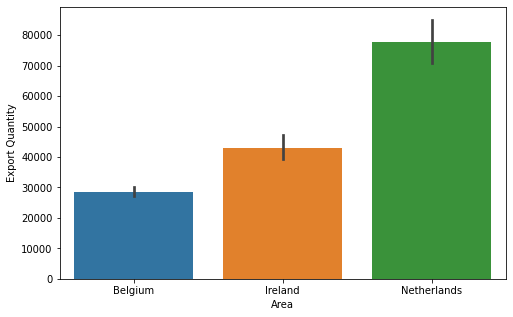

In [14]:
plt.figure(figsize=(8, 5)) # (Width, Height)
ax = sns.barplot(x='Area', y="Export Quantity", data=df)

#### Histograms

Create an Histogram for each column to verify the dataset's distribution 

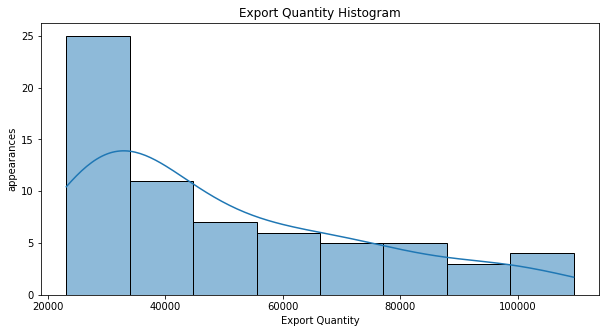

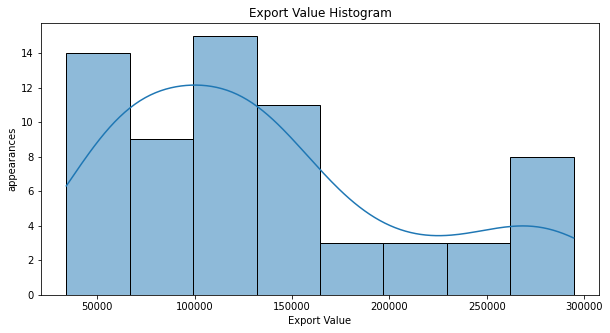

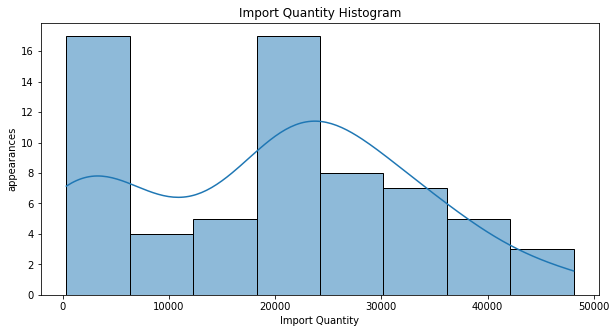

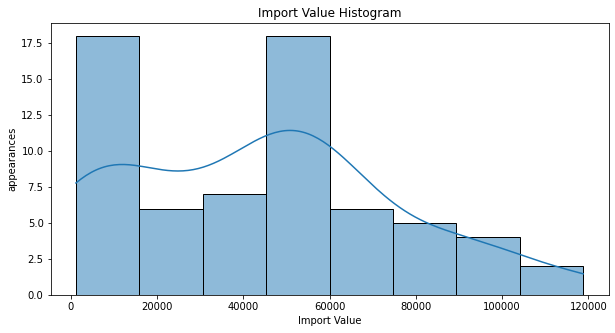

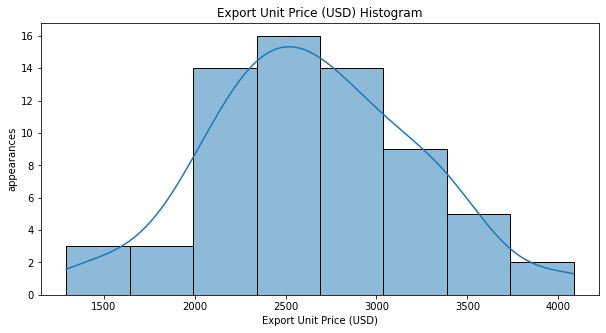

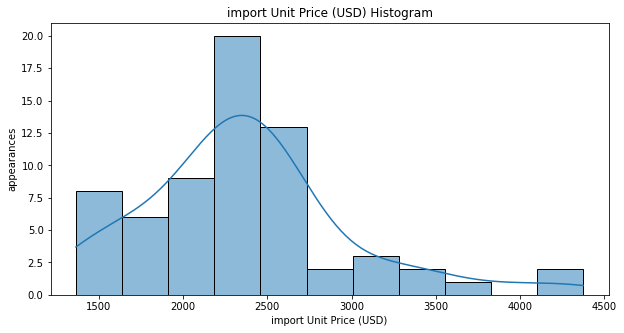

In [15]:
#Create a histogram for each column
for item in columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax = sns.histplot((df[item]), kde = True);
    ax.set(xlabel=f'{item}', ylabel='appearances', title =f'{item} Histogram');

I have created a function to help create Histogram by country and columns

In [16]:
def hist(Country = 'Ireland', column = 'Export Quantity'):
    ax = sns.histplot((df.loc[df['Area'] == Country][column]), kde = True);
    ax.set(xlabel=f'{column}', ylabel='appearances', title =f'{column} Histogram {Country}');

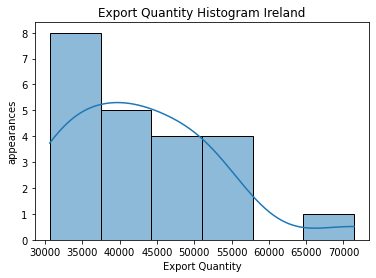

In [17]:
hist()

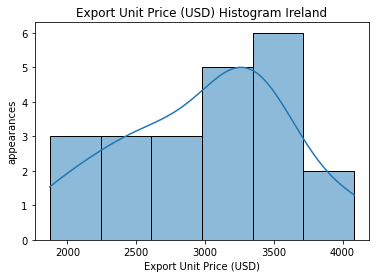

In [18]:
hist('Ireland','Export Unit Price (USD)' )

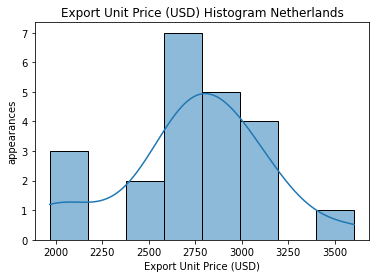

In [19]:
hist('Netherlands','Export Unit Price (USD)' )

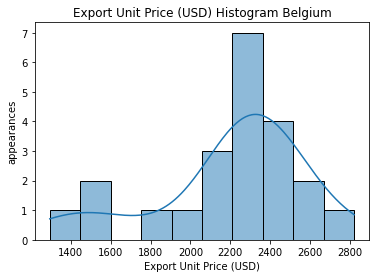

In [20]:
hist('Belgium','Export Unit Price (USD)' )

Histograms 

#### Boxplot

In [21]:
def title(title):
    plt.title(f'{title}', fontdict={'fontsize':18},    pad=14);

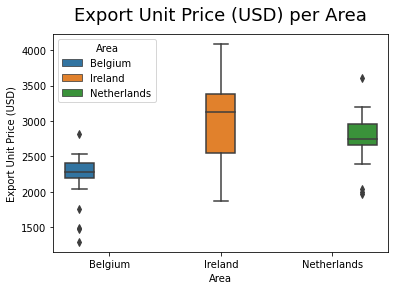

In [22]:
sns.boxplot(x = 'Area', y ='Export Unit Price (USD)', data = df, hue = 'Area');
title('Export Unit Price (USD) per Area');

#### Line Charts

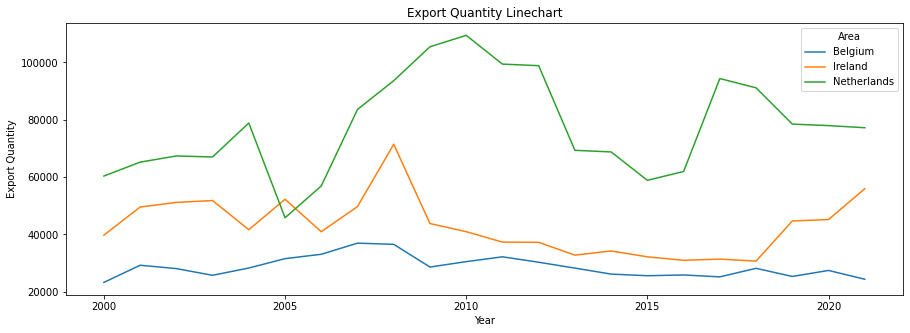

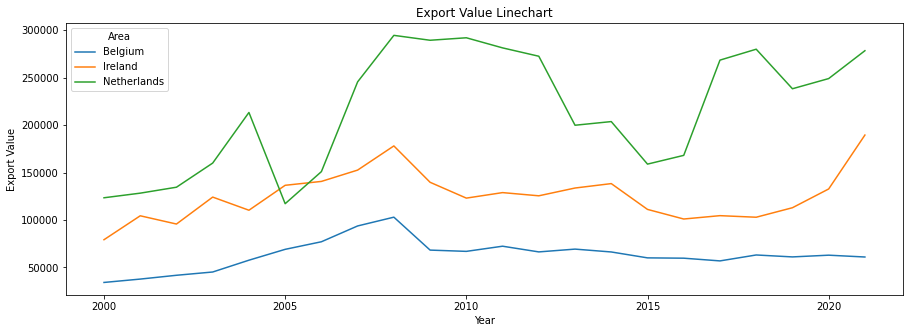

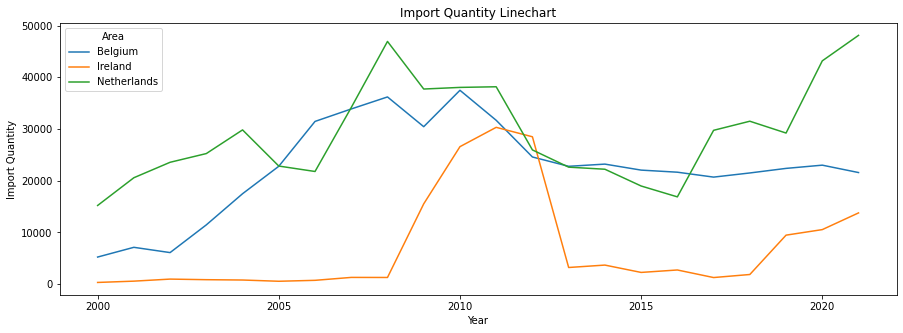

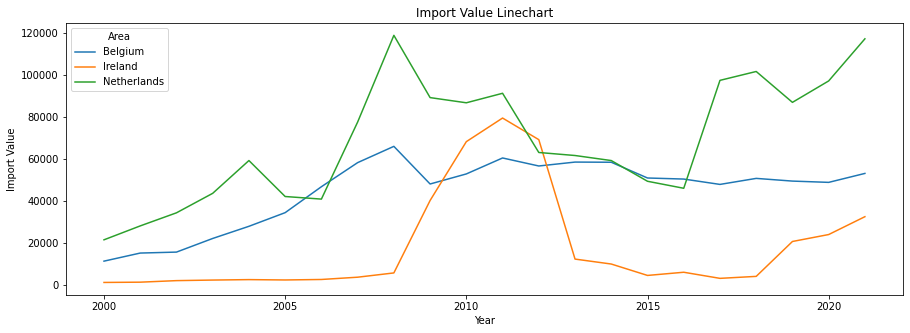

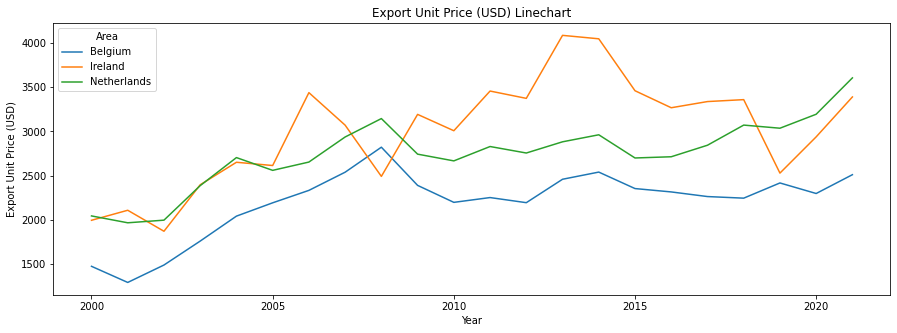

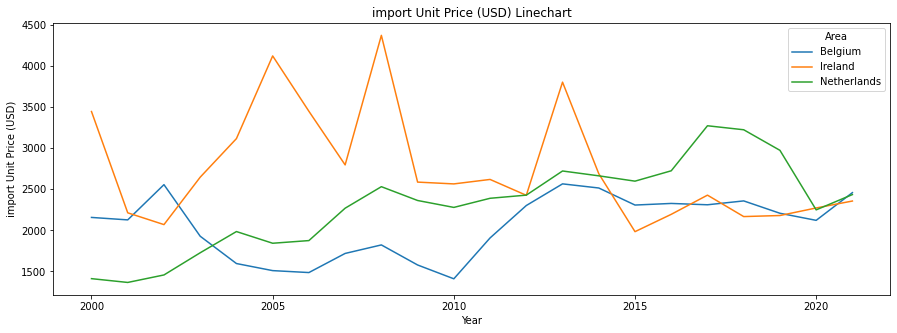

In [23]:
for item in columns:
    fig, ax = plt.subplots(figsize=(15, 5))
    ax = sns.lineplot(data = df ,x="Year", y=item, hue = 'Area', errorbar=None);
    ax.set(xlabel='Year', ylabel=f'{item}', title =f'{item} Linechart');

# Inferential statistics

In [24]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

I will check for the confidence interval for the Export unit price

In [25]:
df['Export Unit Price (USD)'].describe()

count     66.00
mean    2649.50
std      573.34
min     1294.07
25%     2272.60
50%     2632.88
75%     3028.67
max     4084.42
Name: Export Unit Price (USD), dtype: float64

In [26]:
data = []
area = list(df['Area'].unique())
for item in area:
    templist =[]
    templist.append(item)
    templist.append(df.loc[df['Area'] == item]['Export Unit Price (USD)'].mean())
    templist.append(df.loc[df['Area'] == item]['Export Unit Price (USD)'].median())
    templist.append(df.loc[df['Area'] == item]['Export Unit Price (USD)'].mode()[0])
    templist.append(df.loc[df['Area'] == item]['Export Unit Price (USD)'].var())
    templist.append(df.loc[df['Area'] == item]['Export Unit Price (USD)'].std())
    data.append(templist)
CTM_Area = pd.DataFrame(data, columns=["Area","Mean", "Median", "Mode","variance", "STD Deviation"])

In [27]:
CTM_Area

,Area,Mean,Median,Mode,variance,STD Deviation
0,Belgium,2199.82,2281.22,1294.07,142999.76,378.15
1,Ireland,3003.39,3131.13,1872.19,367374.70,606.11
2,Netherlands,2745.28,2749.31,1967.73,154443.46,392.99


I will check for the normality for our variable 

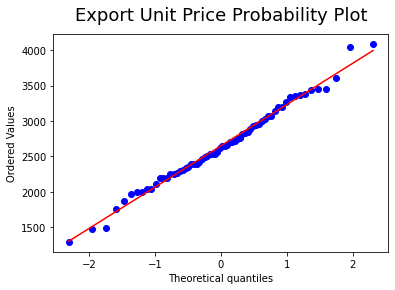

<Figure size 432x288 with 0 Axes>

In [28]:
stats.probplot(df['Export Unit Price (USD)'], plot=plt);
title('Export Unit Price Probability Plot');
plt.figure();

The graph shows that we have very close to a normal distribution

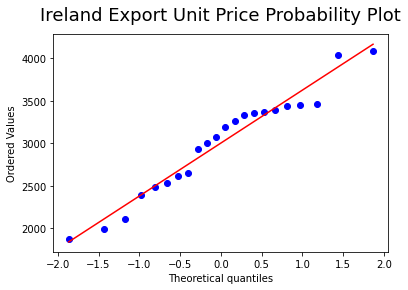

<Figure size 432x288 with 0 Axes>

In [29]:
stats.probplot(df['Export Unit Price (USD)'][df.Area == 'Ireland'], plot=plt);
title('Ireland Export Unit Price Probability Plot');
plt.figure();

Finding the Confidence interval for the Export unit Price based on our sample

In [30]:
st.t.interval(confidence=0.95, df=65, loc=np.mean(df['Export Unit Price (USD)']), scale=st.sem(df['Export Unit Price (USD)']))

(2508.5504851631645, 2790.4410815146134)

In [31]:
# this piece of code was just to understand where does 95% of my data is located 
print(np.percentile(df['Export Unit Price (USD)'], 2.5), np.percentile(df['Export Unit Price (USD)'], 97.5))

1485.3633324425687 3769.6606759308634


#### Inferencial statistical techniques

Check if the average Export Sales price is 2600 USD based on our Sample, at a 5% significance level

#### T-Test one way

In [32]:
#H0: u = 26000
#H1: u =! 2600
stats.ttest_1samp(df['Export Unit Price (USD)'],2600)

Ttest_1sampResult(statistic=0.7013352446616125, pvalue=0.4855972520592373)

We do not reject the null hypotesis (h0) as the pvalue is bigger than 0.05 meaning the Average Export Unit Price of 2600 is in the range of our CI

In [33]:
# Testing the same Hypothesis with values outside my CI
stats.ttest_1samp(df['Export Unit Price (USD)'],2501)

Ttest_1sampResult(statistic=2.1041252307521368, pvalue=0.039240161746763834)

#### T-Test two way

We will verify if there are differences between the average Export Unit Price for Ireland and Netherlands, at a 5% significant level

In [34]:
# Separate the data
Ireland = df.query('Area == "Ireland"')['Export Unit Price (USD)']
Netherlands = df.query('Area == "Netherlands"')['Export Unit Price (USD)']
Belgium = df.query('Area == "Belgium"')['Export Unit Price (USD)']

In [35]:
#h0 Ireland  price == Netherlands Price
#h1 Ireland Price != Netherlands Price

test = stats.ttest_ind(Ireland,Netherlands, equal_var = True)
display(test)

Ttest_indResult(statistic=1.6759025274130297, pvalue=0.10118731246737887)

In [36]:
#h0 Ireland  price == Netherlands Price
#h1 Ireland Price != Netherlands Price

test = stats.ttest_ind(Ireland,Netherlands, equal_var = False)
display(test)

Ttest_indResult(statistic=1.6759025274130297, pvalue=0.10242150549972377)

Considering that the pValue was bigger than 0.05 we accept the the h0 

#### ANOVA one way

We have 4 conditions to proceed with the two-way ANOVA model:
1. The samples must be independent.
2. The groups must have the same sample size.
3. The populations from which the samples were obtained must be normally or 
approximately normally distributed.
4. The variances of the populations must be equal.

1- Samples are independent

2 - Check the sample sizes

In [37]:
df.Area.value_counts()

Belgium        22
Ireland        22
Netherlands    22
Name: Area, dtype: int64

3 - Saphiro 

h0 = Follows Normal Distribution - p > 0.05

h1 = Does not follow a normal distribution - p < 0.05

In [38]:
stats.shapiro(df['Export Unit Price (USD)'][df.Area == 'Ireland'])

ShapiroResult(statistic=0.9526841044425964, pvalue=0.356636106967926)

In [39]:
stats.shapiro(df['Export Unit Price (USD)'][df.Area == 'Netherlands'])

ShapiroResult(statistic=0.9397218227386475, pvalue=0.19533087313175201)

In [40]:
stats.shapiro(df['Export Unit Price (USD)'][df.Area == 'Belgium'])

ShapiroResult(statistic=0.8701381683349609, pvalue=0.007874488830566406)

By the saphiro results Belgium does not follow a normal distribution

In [41]:
Ireland = df['Export Unit Price (USD)'][df.Area == 'Ireland']
Netherlands = df['Export Unit Price (USD)'][df.Area == 'Netherlands']
Belgium = df['Export Unit Price (USD)'][df.Area == 'Belgium']

In [42]:
sd1 = Ireland.std()
sd2 = Netherlands.std()
sd3 = Belgium.std()
print(f'Ireland: {sd1}, Netherlands: {sd2}, Belgium: {sd3}')

Ireland: 606.1144289295102, Netherlands: 392.9929571796034, Belgium: 378.1530928229994


4 - Levene

Levene will mesure the homogeinity of the variance

h0 = Variances are equal - p > 0.05

h1 = Variances are not equal - p < 0.05

In [43]:
from scipy.stats import levene

In [44]:
levene(Ireland, Netherlands, Belgium, center = 'mean')

LeveneResult(statistic=4.24127621388499, pvalue=0.018703620700030132)

In [45]:
levene(Ireland, Netherlands, center = 'mean')

LeveneResult(statistic=5.517363464019603, pvalue=0.023608488676616246)

In [46]:
levene(Netherlands, Belgium, center = 'mean')

LeveneResult(statistic=0.01650624833202665, pvalue=0.8983850239910474)

The Lavene proved that the Variances are not equal

#### Using the Bartlett test
Thats an alternative variance test, and can be used instead of the Levene.

P-Value < 0.05 means Variances are not equal 

In [47]:
stats.bartlett(Ireland, Netherlands, Belgium)

BartlettResult(statistic=6.038831120897394, pvalue=0.048829748060305454)

I needed to change the Column names to be able to perform the ANOVA

In [48]:
df_anova = df[['Area','Year','Export Unit Price (USD)']]

In [49]:
df_anova.rename(columns = {'Export Unit Price (USD)':'UPrice'}, inplace = True, index = None)

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10180\4171907808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anova.rename(columns = {'Export Unit Price (USD)':'UPrice'}, inplace = True, index = None)


In [50]:
df_welchs = df_anova[['Area', 'UPrice']]
df_welchs = df_welchs.loc[df_welchs['Area'].isin(['Ireland', 'Netherlands'])]

ANOVA
h0 = means are equal
h1 = means are not equal

In [51]:
model = ols('UPrice~Area', data = df_anova.loc[df_anova['Area'].isin(['Ireland','Netherlands'])]).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)


            df      sum_sq   mean_sq    F  PR(>F)
Area      1.00   732802.11 732802.11 2.81    0.10
Residual 42.00 10958181.47 260909.08  NaN     NaN


Although I have run the anova above, I can garantee the result is good considering we fail the variance comparisson, because of that I had to try the ANOVA Welchs

In [52]:
from statsmodels.stats.oneway import anova_oneway as welchs

In [53]:
welchs(df_welchs['UPrice'], groups= df_welchs['Area'], use_var='unequal', welch_correction=True)

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 2.808649281389381
pvalue = 0.10242150549972391
df = (1.0, 36.004834408172016)
df_num = 1.0
df_denom = 36.004834408172016
nobs_t = 44.0
n_groups = 2
means = array([3003.38785122, 2745.2824979 ])
nobs = array([22., 22.])
vars_ = array([367374.70095655, 154443.46439277])
use_var = 'unequal'
welch_correction = True
tuple = (2.808649281389381, 0.10242150549972391)

#### Anova Two Ways

In [54]:
model = ols('UPrice~Area+Year', data = df_anova.loc[df_anova['Area'].isin(['Ireland','Netherlands'])]).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

            df     sum_sq    mean_sq     F  PR(>F)
Area      1.00  732802.11  732802.11  5.10    0.03
Year      1.00 5072537.59 5072537.59 35.34    0.00
Residual 41.00 5885643.89  143552.29   NaN     NaN


As we can see we could not get good results as we didnt meet all the requirements for the ANOVA, therefore we will try a non-parametric test

#### U - Mann Whitney Test

h0 = Sample distributions are equal.

h1 = Sample distributions are not equal.

In [55]:
from scipy.stats import mannwhitneyu

In [56]:
mannwhitneyu(df.loc[df['Area']=='Ireland']['Export Unit Price (USD)'],df.loc[df['Area']=='Netherlands']['Export Unit Price (USD)'] )

MannwhitneyuResult(statistic=309.0, pvalue=0.11854035019842724)